In [102]:
%pip install -q numpy scipy pandas matplotlib seaborn scikit-learn mglearn
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

print("Python version:", sys.version)
print("pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("SciPy version:", sp.__version__)
print("IPython version:", IPython.__version__)
print("scikit-learn version:", sklearn.__version__)
print("mglearn version:", mglearn.__version__)
print("seaborn version:", sns.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
pandas version: 2.2.2
NumPy version: 2.0.2
SciPy version: 1.16.2
IPython version: 7.34.0
scikit-learn version: 1.6.1
mglearn version: 0.1.9
seaborn version: 0.13.2


In [103]:
ca_housing_dataset = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

In [104]:
ca_housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [105]:
ca_housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [106]:
ca_housing_df = ca_housing_dataset.drop(columns=['ocean_proximity'])
ca_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [107]:
ca_housing_df = ca_housing_df.dropna()

In [108]:
ca_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


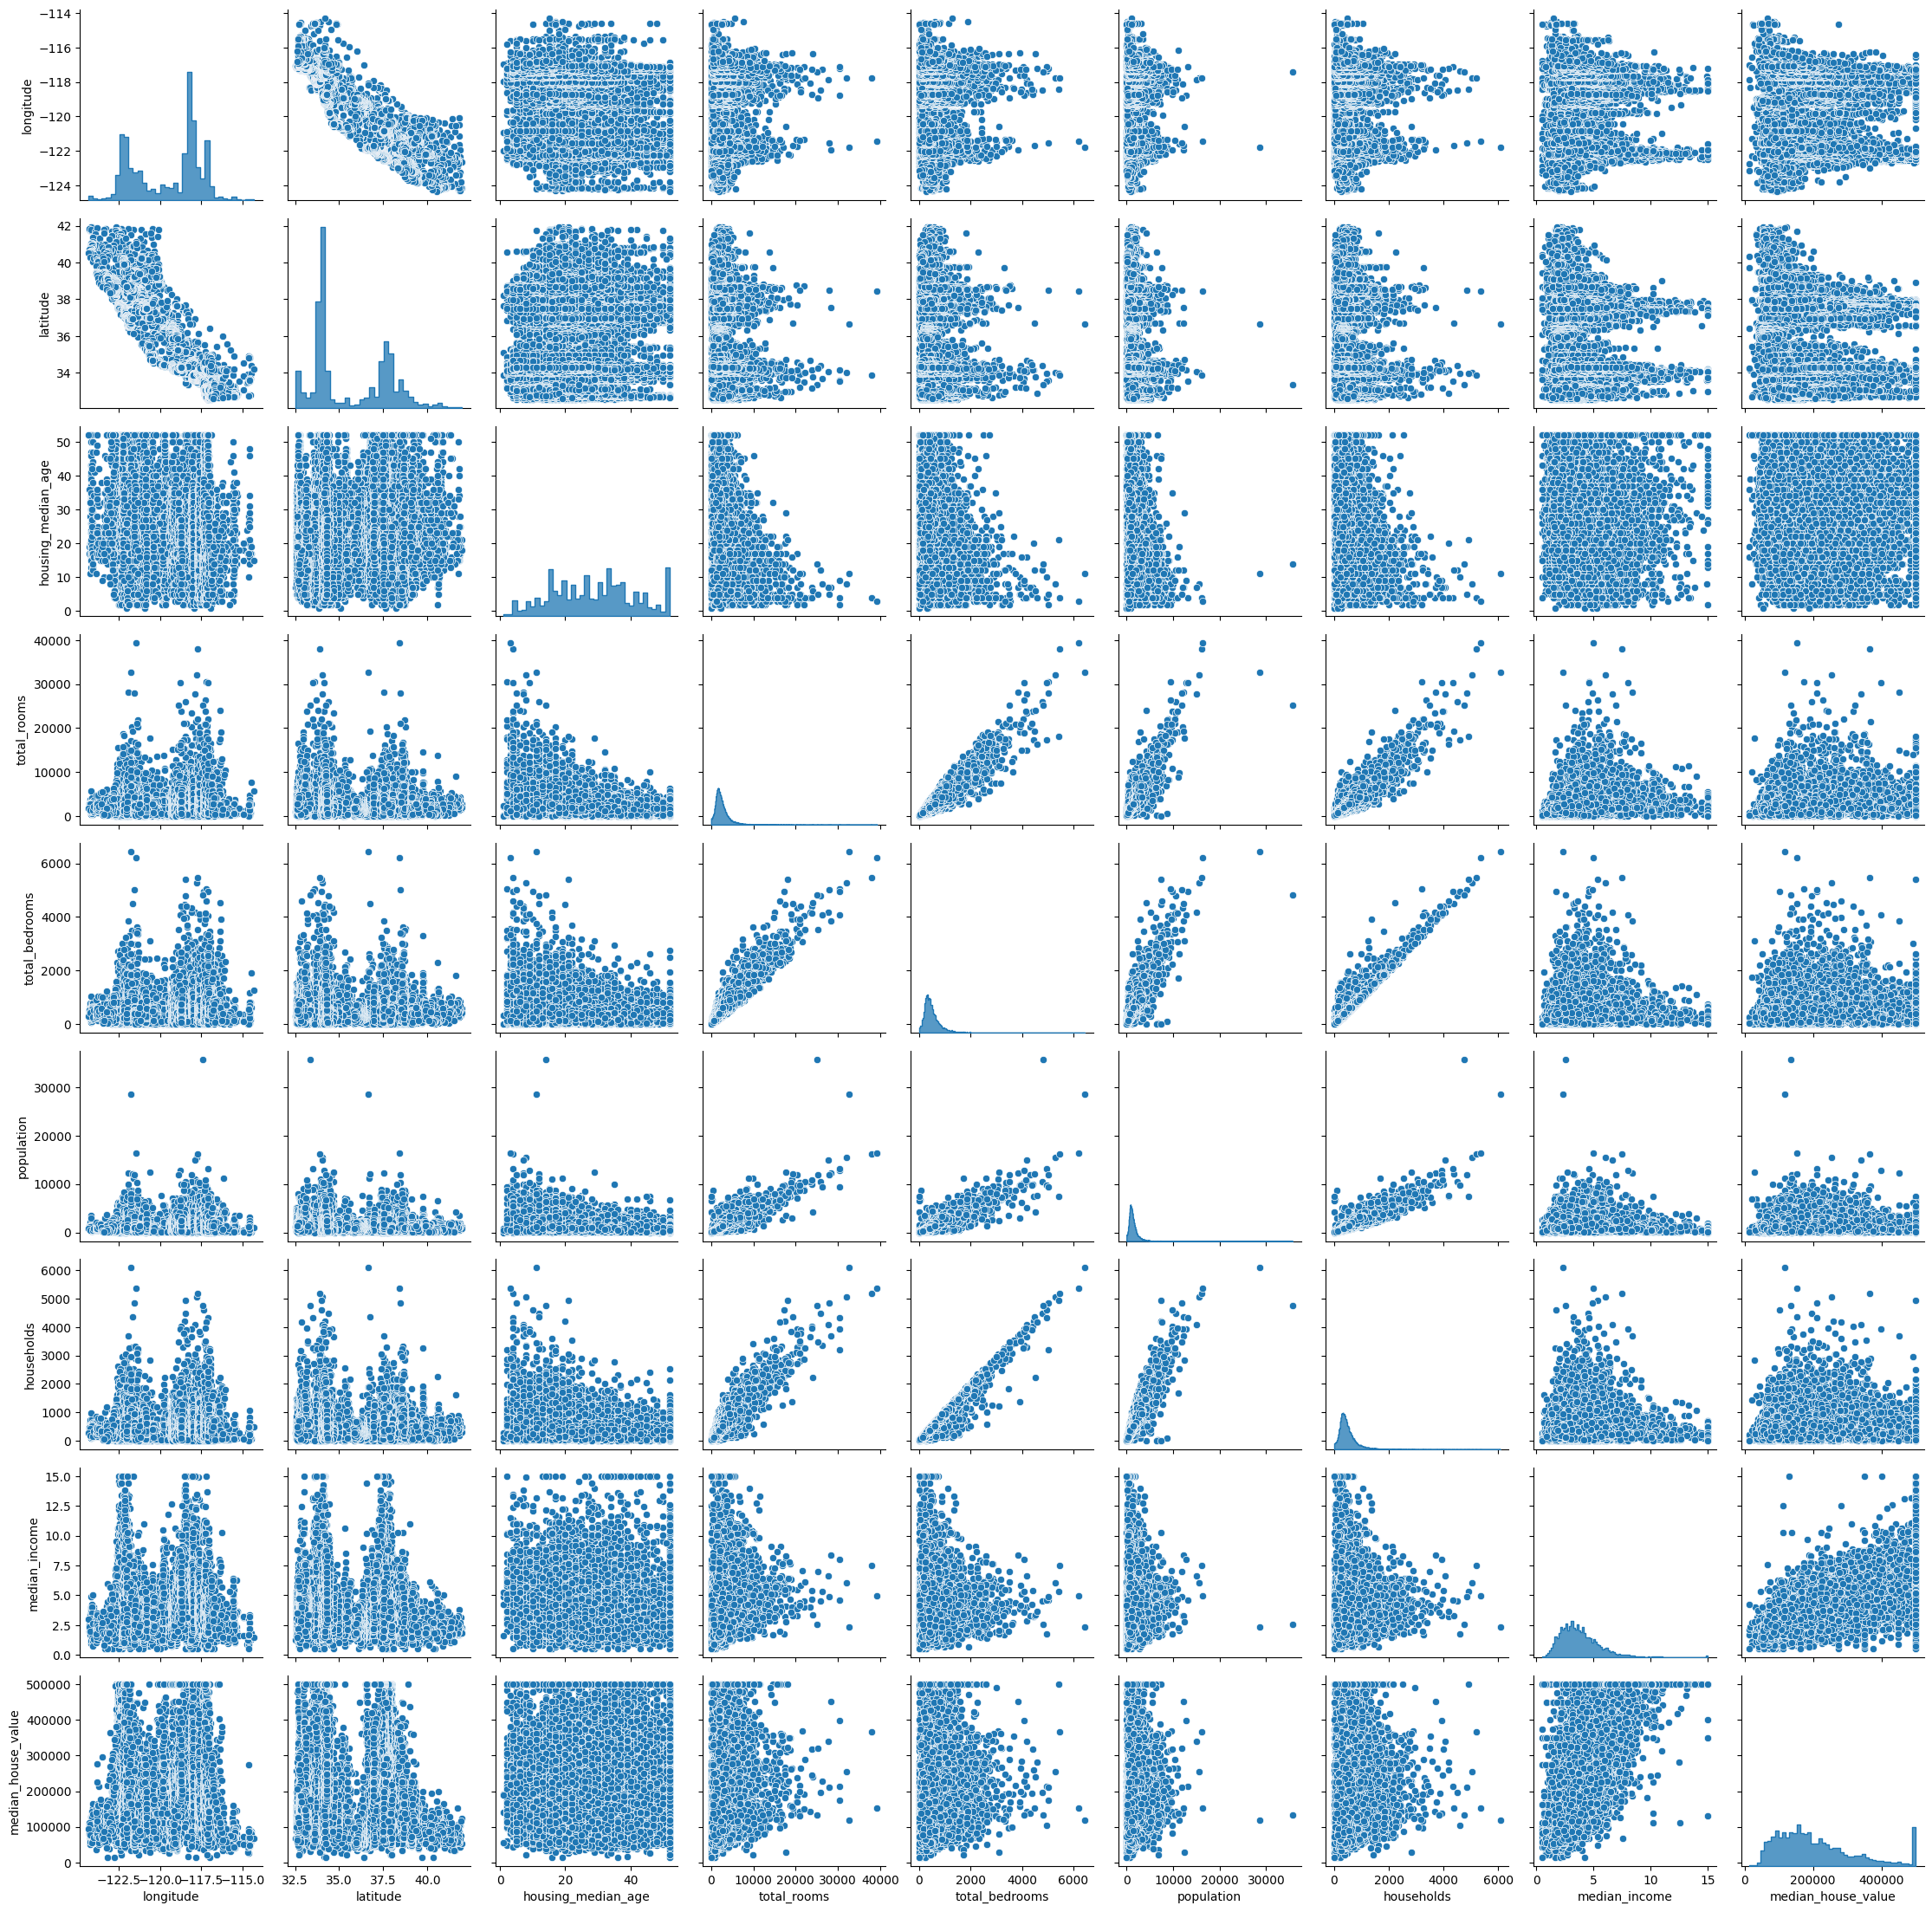

In [9]:
g = sns.PairGrid(ca_housing_df)
g.map_diag(sns.histplot, element="step")
g.map_offdiag(sns.scatterplot)

In [110]:
cleaned_data = ca_housing_df[['median_income', 'median_house_value']]
cleaned_data.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


In [111]:
X = cleaned_data[['median_income']]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [112]:
y = cleaned_data['median_house_value']
print(type(y))

<class 'pandas.core.series.Series'>


In [113]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [114]:
print(type(X_train))
X

<class 'pandas.core.frame.DataFrame'>


,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [33]:
print(type(X_test))
X

<class 'pandas.core.frame.DataFrame'>


,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [35]:
print(type(y_train))
y_train

<class 'pandas.core.series.Series'>


,median_house_value
2830,44600.0
14951,155000.0
8314,450000.0
14271,65700.0
305,91200.0
...,...
11397,273400.0
12081,160800.0
5447,335400.0
866,231200.0


In [37]:
print(type(y_test))
y_test

<class 'pandas.core.series.Series'>


,median_house_value
14416,245800.0
16383,137900.0
7731,218200.0
1410,220800.0
1335,170500.0
...,...
14148,122500.0
14743,142400.0
19496,138100.0
20553,95300.0


In [117]:
lr = sklearn.linear_model.LinearRegression().fit(X_train[['median_income']], y_train)
print("intercept: ", lr.intercept_)
print("coeff: ", lr.coef_)

train = pd.concat([X_train, y_train], axis=1)
train.head()

intercept:  45651.03110760948
coeff:  [41644.56048539]


,median_income,median_house_value
2830,1.7109,44600.0
14951,2.4567,155000.0
8314,2.1579,450000.0
14271,1.0531,65700.0
305,1.8913,91200.0


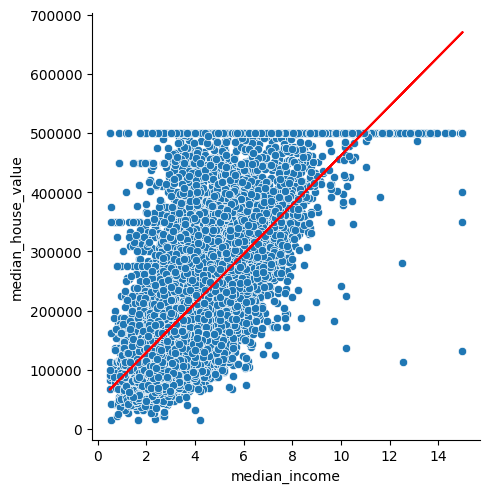

In [118]:
sns.relplot(x='median_income', y='median_house_value', data=train)
p = lr.predict(X_train)
plt.plot(X_train, p, color='red')

In [120]:
test = pd.concat([X_test, y_test], axis=1)
test.head()


,median_income,median_house_value
14416,3.1838,245800.0
16383,4.4871,137900.0
7731,3.2237,218200.0
1410,2.8920,220800.0
1335,4.1016,170500.0


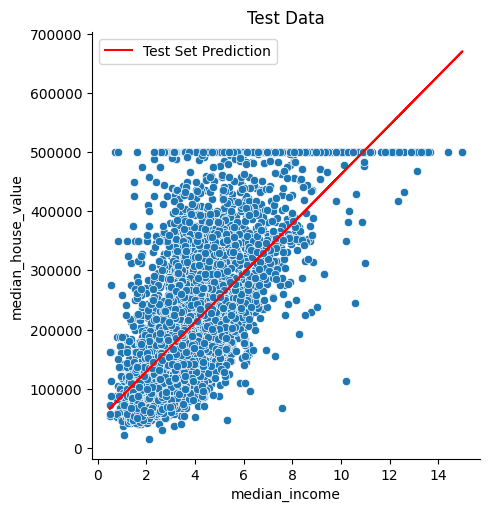

In [126]:
g = sns.relplot(x='median_income', y='median_house_value', data=test, kind='scatter')
p_test = lr.predict(X_test[['median_income']])

ax = g.ax
ax.plot(X_test['median_income'], p_test, color='red', label='Test Set Prediction')
ax.set_title('Test Data')
ax.legend()
plt.show()

In [89]:
print(f"Train data:")
p_train = lr.predict(X_train[['median_income']])
mse_train = sklearn.metrics.mean_squared_error(y_train, p_train)
print("MSE: ", mse_train)
r2_train = sklearn.metrics.r2_score(y_train, p_train)
print("R2: ", r2_train)

print(f"\nTest data:")
p_test = lr.predict(X_test[['median_income']])
mse_test = sklearn.metrics.mean_squared_error(y_test, p_test)
print("MSE: ", mse_test)
r2_test = sklearn.metrics.r2_score(y_test, p_test)
print("R2: ", r2_test)

Train data:
MSE:  6997481718.923448
R2:  0.472154321514369

Test data:
MSE:  7052223802.224631
R2:  0.47872609012331746


In [127]:
avg_train = y_train.mean()
avg_test = y_test.mean()

percentage_train = 100 * mse_train / (avg_train ** 2)
percentage_test = 100 * mse_test / (avg_test ** 2)

print(f"MSE Train is {percentage_train:,.2f}% of mean target squared.")
print(f"MSE Test is {percentage_test:,.2f}% of mean target squared.")

MSE Train is 16.34% of mean target squared.
MSE Test is 16.51% of mean target squared.
